In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import warnings  
warnings.filterwarnings('ignore')
import os
os.chdir('C:\\Users\\HOME10\\Desktop\\Data Mining')
os.getcwd()

'C:\\Users\\HOME10\\Desktop\\Data Mining'

In [2]:
# Importing Data
df=pd.read_csv("accidents_2017.csv")
df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


# **Data Exploration**

In [3]:
df.shape

(10339, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


**Check for Missing Values**
No Missing Values in our dataset

In [5]:
df.isnull().sum()

Id                   0
District Name        0
Neighborhood Name    0
Street               0
Weekday              0
Month                0
Day                  0
Hour                 0
Part of the day      0
Mild injuries        0
Serious injuries     0
Victims              0
Vehicles involved    0
Longitude            0
Latitude             0
dtype: int64

Rename Columns for easy usage

In [6]:
df.rename(columns={'Neighborhood Name': 'Neighborhood_Name','District Name':'District_Name','Part of the day':'Part_of_the_day','Mild injuries':'Mild_injuries', 'Serious injuries':'Serious_injuries','Vehicles involved':'Vehicles_involved'}, index={'ONE': 'one'}, inplace=True)
df.columns

Index(['Id', 'District_Name', 'Neighborhood_Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part_of_the_day', 'Mild_injuries',
       'Serious_injuries', 'Victims', 'Vehicles_involved', 'Longitude',
       'Latitude'],
      dtype='object')

In [7]:
df["Neighborhood_Name"].nunique() #Number of unique values in column Neighborhood_Name

74

In [8]:
df["Vehicles_involved"].unique()

array([ 2,  3,  1,  4,  5,  6, 13,  8,  9,  7, 10,  0, 11, 14],
      dtype=int64)

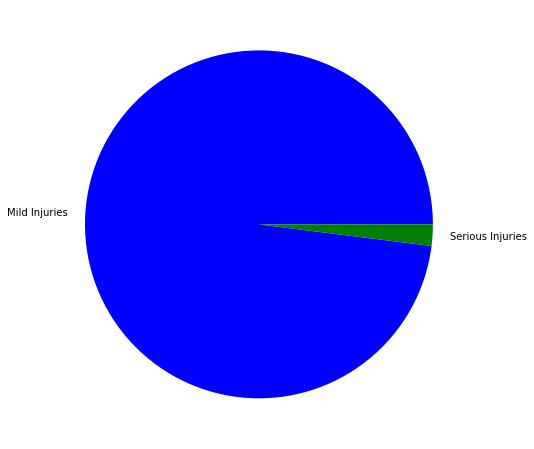

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
labels = ["Mild Injuries","Serious Injuries"]
values = [11933,241]
colors=['blue','green']
plt.pie(values, labels=labels, colors=colors)
plt.show()

In [10]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


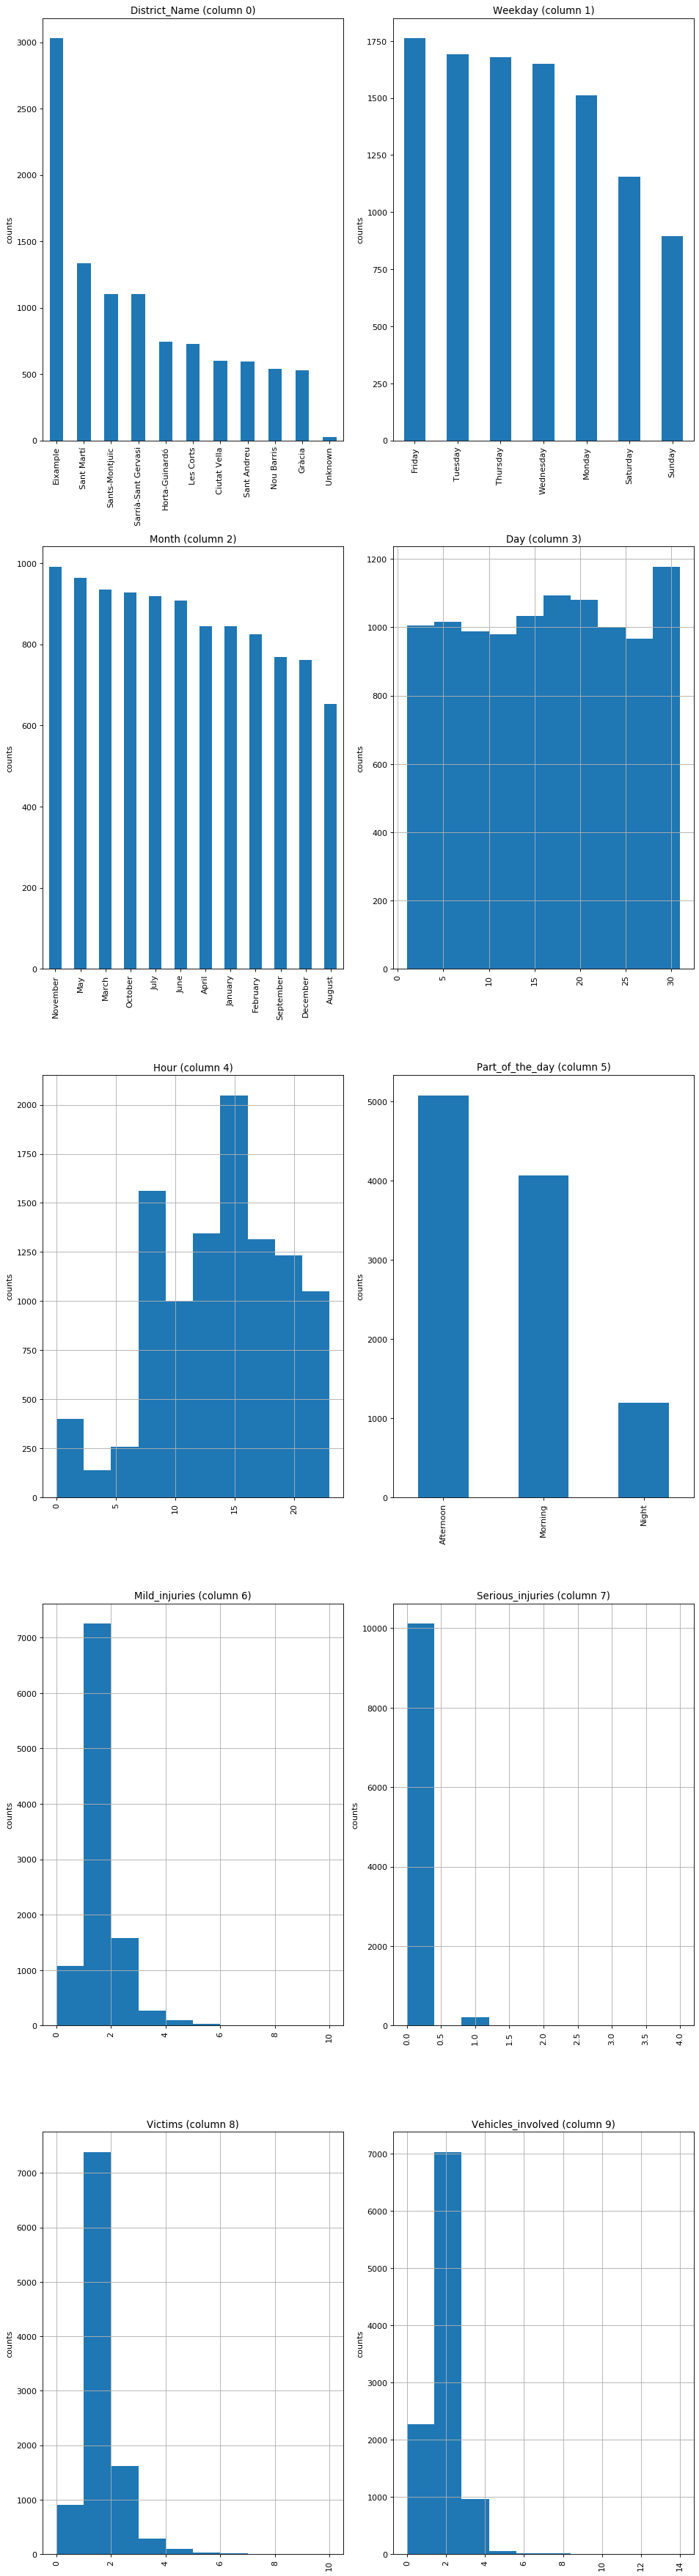

In [11]:
plotPerColumnDistribution(df, 10, 2)

In [12]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


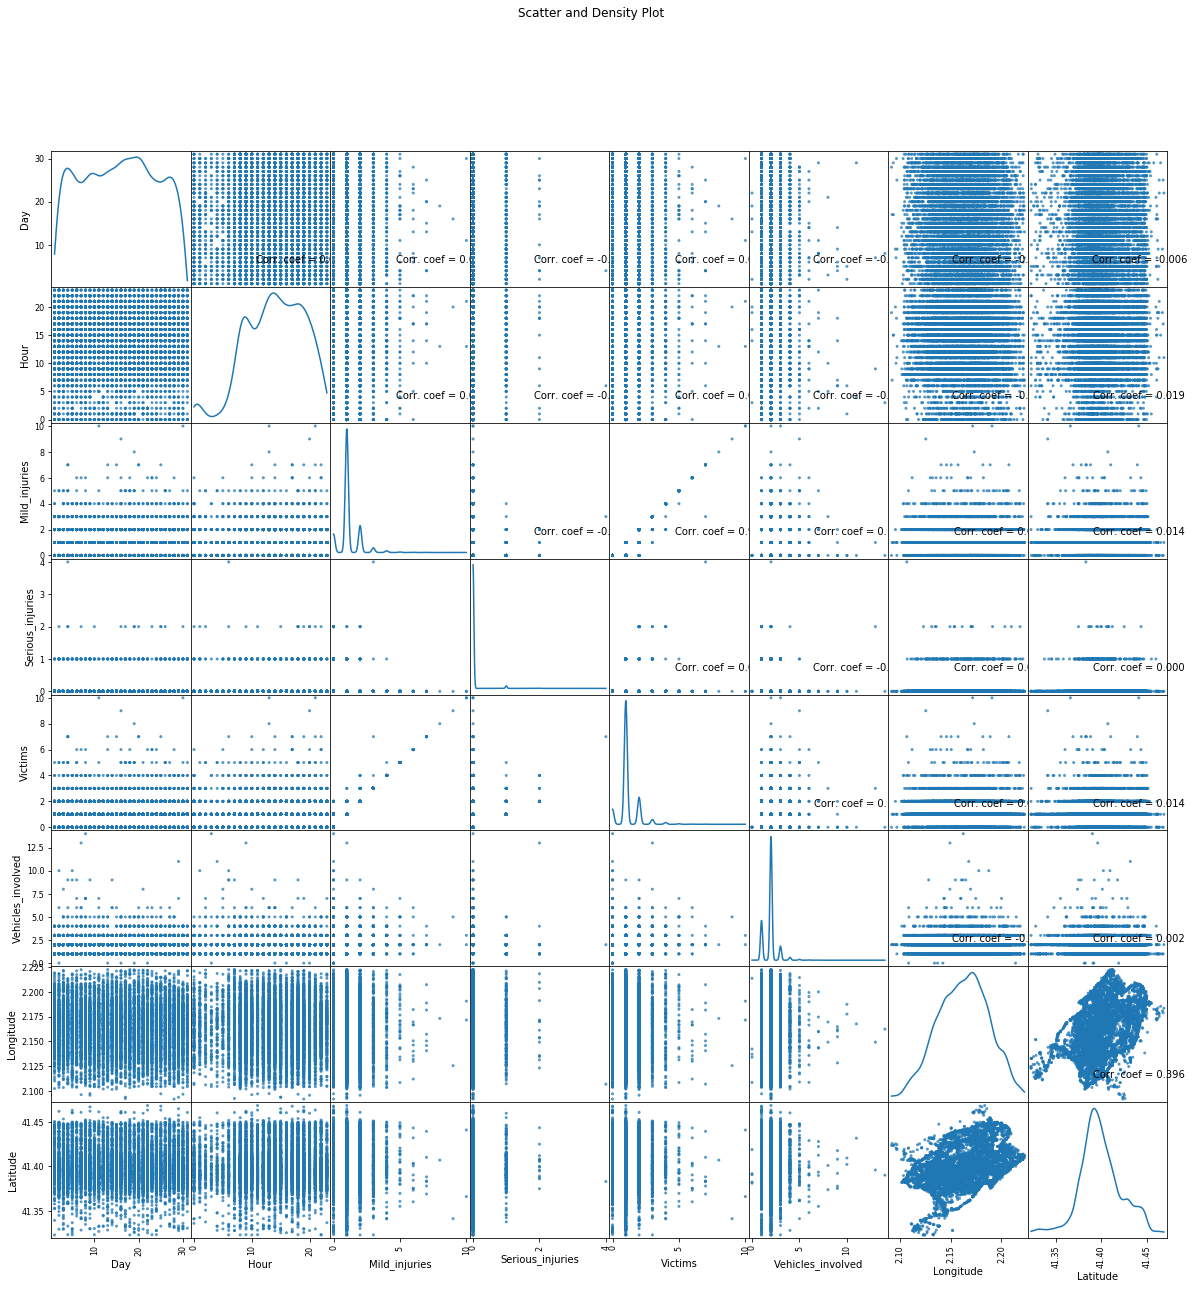

In [13]:
plotScatterMatrix(df, 20, 10)

**Summary Statistic**

In [14]:
df.describe()

,Day,Hour,Mild_injuries,Serious_injuries,Victims,Vehicles_involved,Longitude,Latitude
count,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000
mean,15.775994,13.811394,1.154174,0.023310,1.178644,1.920979,2.162832,41.399346
std,8.763455,5.316490,0.742294,0.163803,0.735145,0.714011,0.024176,0.021251
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.091855,41.323094
25%,8.000000,10.000000,1.000000,0.000000,1.000000,2.000000,2.144985,41.386288
50%,16.000000,14.000000,1.000000,0.000000,1.000000,2.000000,2.163399,41.396730
75%,23.000000,18.000000,1.000000,0.000000,1.000000,2.000000,2.180179,41.411038
max,31.000000,23.000000,10.000000,4.000000,10.000000,14.000000,2.222572,41.468244


**Check if there are any outliers using Boxplot**

BOXPLOT


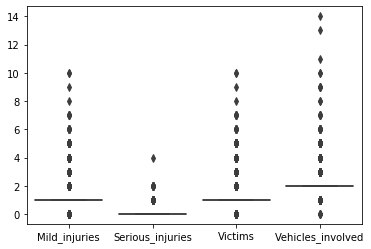

In [15]:
print('BOXPLOT')
ax = sns.boxplot(data = df[['Mild_injuries', 'Serious_injuries', 'Victims','Vehicles_involved']], orient ='v')

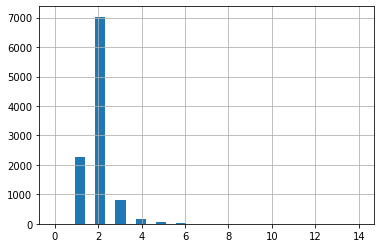

In [16]:
df['Vehicles_involved'].hist(bins=30)

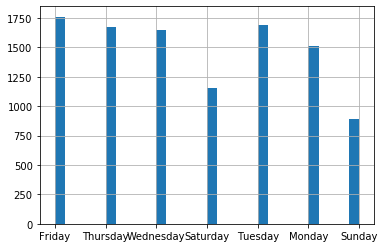

In [17]:
df['Weekday'].hist(bins=30)

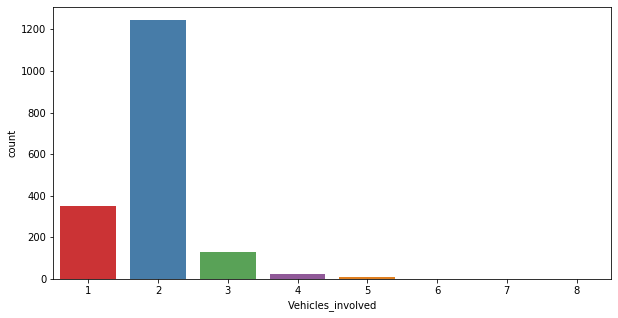

In [18]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df[df['Weekday'] == "Friday"],
    x='Vehicles_involved',
    palette='Set1'
)

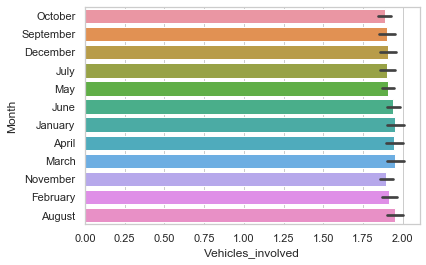

In [19]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Vehicles_involved",y="Month",data=df)

In [20]:
#Sorting accident number by month
month_data = df[['Month','Vehicles_involved','Victims','Mild_injuries','Serious_injuries',]]
month_data = month_data.set_index('Month')
month_data = month_data.groupby(level=[0]).sum()
month_data = month_data.sort_index()
month_data.head()

,Vehicles_involved,Victims,Mild_injuries,Serious_injuries
Month,,,,
April,1644,936,912,23
August,1274,803,793,10
December,1454,898,883,13
February,1578,942,925,17
January,1648,991,975,14


In [21]:
part_day_data = df[['Vehicles_involved','Victims','Part_of_the_day','Mild_injuries','Serious_injuries',]]
part_day_data = part_day_data.set_index('Part_of_the_day')
part_day_data = part_day_data.groupby(level=[0]).sum()
part_day_data = part_day_data.sort_index()
part_day_data.head()

,Vehicles_involved,Victims,Mild_injuries,Serious_injuries
Part_of_the_day,,,,
Afternoon,9746,6092,5969,120
Morning,7843,4712,4627,79
Night,2272,1382,1337,42


In [22]:
hour_day_data = df[['Hour','Vehicles_involved','Victims','Mild_injuries','Serious_injuries',]]
hour_day_data = hour_day_data.set_index('Hour')
hour_day_data = hour_day_data.groupby(level=[0]).sum()
hour_day_data = hour_day_data.sort_index()
hour_day_data.head()

,Vehicles_involved,Victims,Mild_injuries,Serious_injuries
Hour,,,,
0,350,235,227,8
1,251,156,146,9
2,166,78,74,4
3,107,49,48,1
4,159,75,73,1


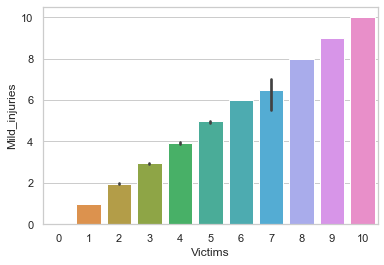

In [23]:
from numpy import median
from numpy import mean
sns.set(style="whitegrid")
ax = sns.barplot(x="Victims",y="Mild_injuries",data=df, estimator=mean)

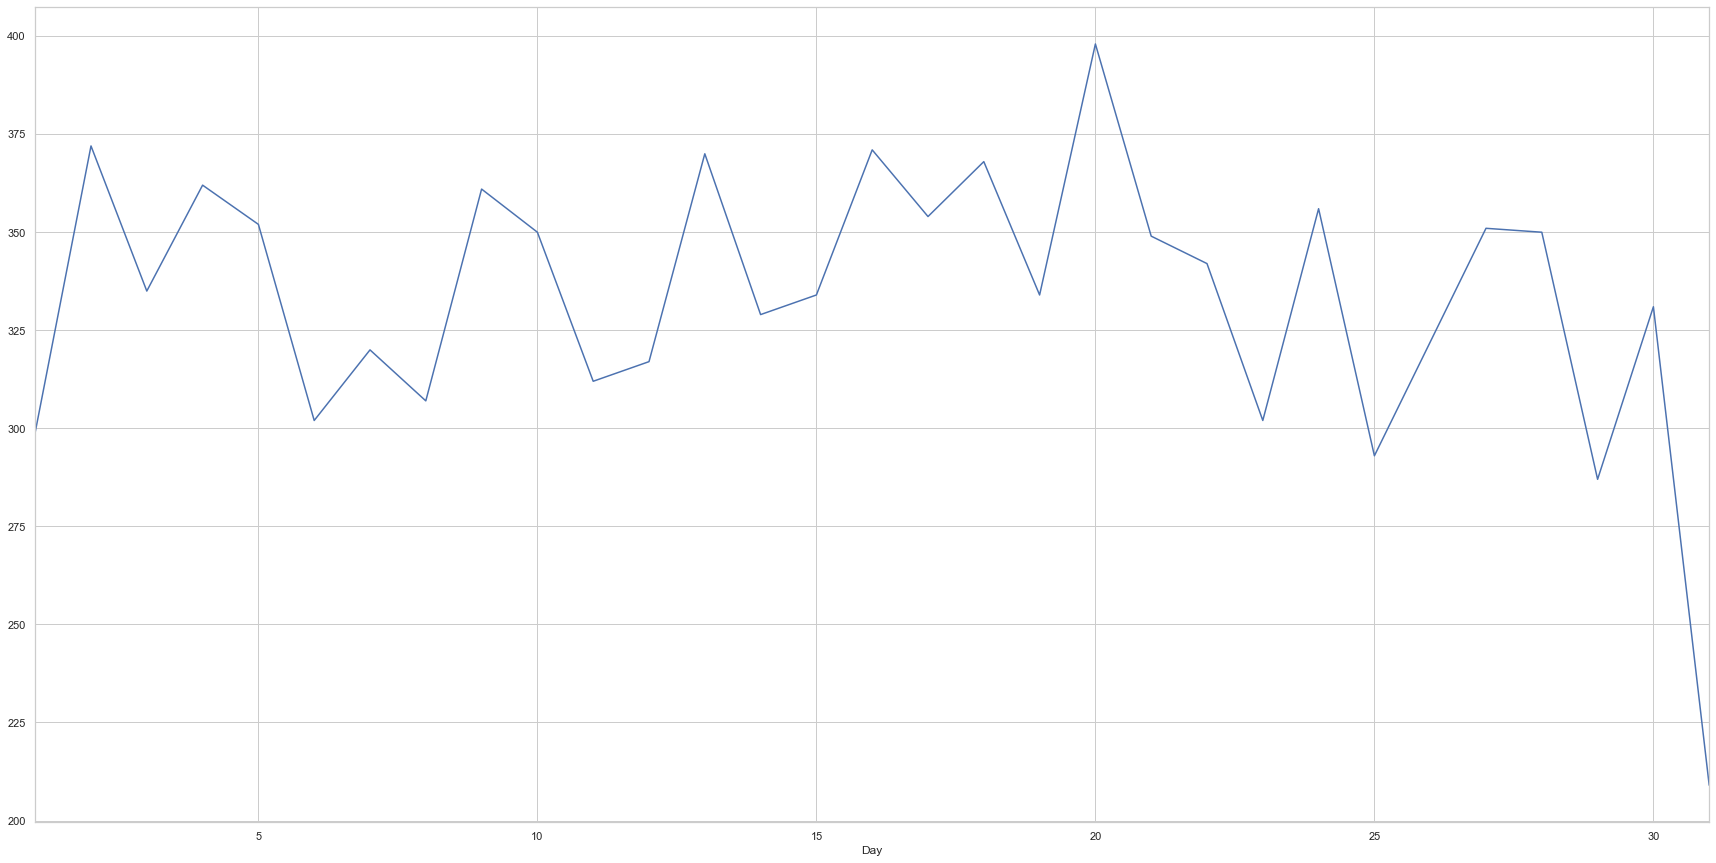

In [24]:
plt.figure(figsize = (30,15))
df.groupby('Day')['Victims'].count().plot(kind='line')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


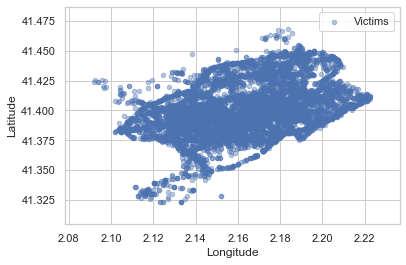

In [25]:
#Scatter Plot for Latitude and longitude
df.plot(kind="scatter",label='Victims', x="Longitude", y="Latitude", alpha=0.4)
plt.show()

In [26]:
df.corr()

,Day,Hour,Mild_injuries,Serious_injuries,Victims,Vehicles_involved,Longitude,Latitude
Day,1.000000,0.012877,0.006975,-0.001686,0.006407,-0.010914,-0.017236,-0.006184
Hour,0.012877,1.000000,0.042420,-0.007614,0.040177,-0.022223,-0.006215,0.018699
Mild_injuries,0.006975,0.042420,1.000000,-0.150482,0.974272,0.160052,0.008475,0.014091
Serious_injuries,-0.001686,-0.007614,-0.150482,1.000000,0.071450,-0.015678,0.005372,0.000299
Victims,0.006407,0.040177,0.974272,0.071450,1.000000,0.157185,0.009355,0.013520
Vehicles_involved,-0.010914,-0.022223,0.160052,-0.015678,0.157185,1.000000,-0.006864,0.002440
Longitude,-0.017236,-0.006215,0.008475,0.005372,0.009355,-0.006864,1.000000,0.396106
Latitude,-0.006184,0.018699,0.014091,0.000299,0.013520,0.002440,0.396106,1.000000


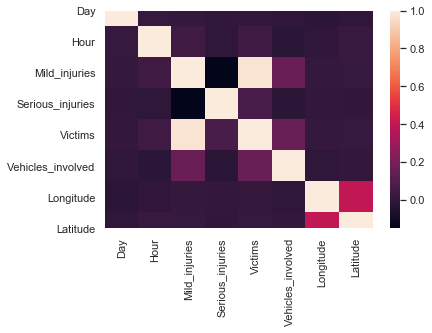

In [27]:
sns.heatmap(df.corr())

In [28]:
df.columns

Index(['Id', 'District_Name', 'Neighborhood_Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part_of_the_day', 'Mild_injuries',
       'Serious_injuries', 'Victims', 'Vehicles_involved', 'Longitude',
       'Latitude'],
      dtype='object')

# **FEATURE ENGINEERING**

In [29]:

cols = ["Id", "District_Name", "Neighborhood_Name", "Part_of_the_day", "Month"]
for c in cols:
    df[c] = df[c].fillna("")

def extract_features(df):    
    for c in cols:
        df[c+"_len"] = df[c].apply(lambda x : len(str(x)))
        df[c+"_wc"] = df[c].apply(lambda x : len(str(x.split())))

    
extract_features(df)

# **One Hot Encoding**

In [30]:

cat_cols = ["Id", "District_Name", "Neighborhood_Name", "Part_of_the_day", "Month"]
for c in cat_cols:
    encoded = pd.get_dummies(df[c])
    df = pd.concat([df, encoded], axis=1)

In [31]:
from sklearn.preprocessing import LabelEncoder
x = df.select_dtypes(exclude=['number']) \
                .apply(LabelEncoder().fit_transform) \
                .join(df.select_dtypes(include=['number']))

In [32]:
x

,Id,District_Name,Neighborhood_Name,Street,Weekday,Month,Part_of_the_day,Day,Hour,Mild_injuries,...,December,February,January,July,June,March,May,November,October,September
0,7989,10,24,2661,0,10,1,13,8,2,...,0,0,0,0,0,0,0,0,1,0
1,6889,10,24,2666,0,11,1,1,13,2,...,0,0,0,0,0,0,0,0,0,1
2,9760,10,24,2157,0,2,0,8,21,5,...,1,0,0,0,0,0,0,0,0,0
3,5945,10,24,2663,0,5,2,21,2,1,...,0,0,0,1,0,0,0,0,0,0
4,4209,7,35,2117,4,8,0,25,14,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,3265,6,33,2158,5,0,1,25,8,1,...,0,0,0,0,0,0,0,0,0,0
10335,1893,6,33,2879,6,7,1,8,12,1,...,0,0,0,0,0,1,0,0,0,0
10336,10267,6,33,2158,4,2,1,28,8,1,...,1,0,0,0,0,0,0,0,0,0
10337,5729,6,33,2157,0,5,0,14,14,1,...,0,0,0,1,0,0,0,0,0,0


**IMPORT MODELLING LIBARY**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedKFold
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

**Select Dependent and Independent Variable**

In [34]:
x.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in x.columns]
idd, target ="Part_of_the_day","District_Name"
features = [f for f in x.columns if f not in [idd, target]]

In [35]:
X = x[features]
y = x[target]

**Train and Test Split**

In [36]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(8271, 10460) (8271,)
(2068, 10460) (2068,)


# **Logistic Regression**

# **Modelling**

In [37]:
classifier = LogisticRegression()
model=classifier.fit(X_train, y_train)

# **Prediction**

In [38]:
pred = classifier.predict(X_test)

#  the classification_report,confusion_matrix, accuracy_score

In [39]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [40]:
print ('#LOGISTIC REGRESSION')
print(classification_report(y_test,pred )) #LOgistic Regression

#LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       646
           2       1.00      1.00      1.00       114
           3       1.00      1.00      1.00       131
           4       1.00      1.00      1.00       136
           5       1.00      1.00      1.00       117
           6       1.00      1.00      1.00       123
           7       1.00      1.00      1.00       264
           8       1.00      1.00      1.00       219
           9       1.00      1.00      1.00       210
          10       1.00      1.00      1.00         2

    accuracy                           1.00      2068
   macro avg       1.00      1.00      1.00      2068
weighted avg       1.00      1.00      1.00      2068



**CONFUSION MATRIX**

In [41]:
print ('#LOGISTIC REGRESSION')
print(confusion_matrix(y_test,pred ))

#LOGISTIC REGRESSION
[[106   0   0   0   0   0   0   0   0   0   0]
 [  0 646   0   0   0   0   0   0   0   0   0]
 [  0   0 114   0   0   0   0   0   0   0   0]
 [  0   0   0 131   0   0   0   0   0   0   0]
 [  0   0   0   0 136   0   0   0   0   0   0]
 [  0   0   0   0   0 117   0   0   0   0   0]
 [  0   0   0   0   0   0 123   0   0   0   0]
 [  0   0   0   0   0   0   0 264   0   0   0]
 [  0   0   0   0   0   0   0   0 219   0   0]
 [  0   0   0   0   0   0   0   0   0 210   0]
 [  0   0   0   0   0   0   0   0   0   0   2]]


**ACCURACY SCORE**

In [42]:
print ('#LOGISTIC REGRESSION')
print(accuracy_score(y_test,pred ))

#LOGISTIC REGRESSION
1.0


In [43]:
pred[0:5] #Checking some of the prediction 

array([4, 3, 1, 0, 7])

Note: because I used [0:5] after predictions, it only showed the first five predicted values. 
Removing the [0:5] would have made it print all of the predicted values that our model created.

Text(0, 0.5, 'Predictions')

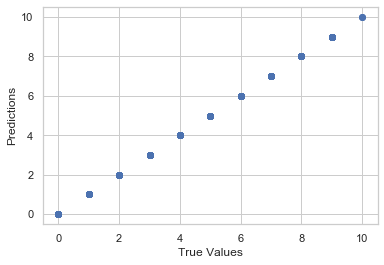

In [44]:
## The line / model
plt.scatter(y_test, pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

**plot of the model**

# **KFOLD (CROSS VALIDATION)**

In [45]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [46]:
# Perform 6-fold cross validation
scores = cross_val_score(model, x, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [1.         0.99884125 1.         1.         1.         1.        ]


As you remember, earlier on I’ve created the train/test split for the Accident dataset and fitted a model. Let’s see what is the score after cross validation:
Before cross validation 
Accuracy = 0.9990328820116054
After Cross Validation
Accuracy = 0.99884125, 0.99942063, **1.0**, 0.99883856, 0.99883788, 0.99767307

We were able to move our accuracy from 99% to 100%

In [47]:
predictions = cross_val_predict(model, x, y, cv=6)

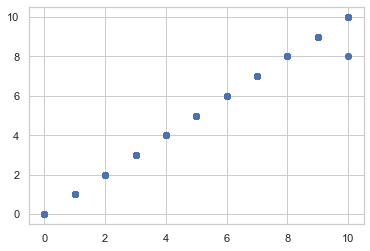

In [48]:
plt.scatter(y, predictions)

In [49]:
print ('#LOGISTIC REGRESSION')
print(classification_report(y,predictions)) #LOgistic Regression

print ('#LOGISTIC REGRESSION')
print(confusion_matrix(y,predictions))


#LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00      3029
           2       1.00      1.00      1.00       531
           3       1.00      1.00      1.00       743
           4       1.00      1.00      1.00       726
           5       1.00      1.00      1.00       542
           6       1.00      1.00      1.00       597
           7       1.00      1.00      1.00      1336
           8       1.00      1.00      1.00      1104
           9       1.00      1.00      1.00      1104
          10       1.00      0.93      0.96        27

    accuracy                           1.00     10339
   macro avg       1.00      0.99      1.00     10339
weighted avg       1.00      1.00      1.00     10339

#LOGISTIC REGRESSION
[[ 600    0    0    0    0    0    0    0    0    0    0]
 [   0 3029    0    0    0    0    0    0    0    0    0]
 [   0    0  531    0    0   